STEP 1:LOAD THE DATA WE ARE LOADING "high_popularity_spotify_data"

In [4]:
import pandas as pd
dataset = pd.read_csv(r"C:\Users\user\Desktop\MATLAB\Spotify project\Datset\high_popularity_spotify_data.csv")# we have to use r to load the dta
dataset.head(3)

,energy,tempo,danceability,playlist_genre,loudness,liveness,valence,track_artist,time_signature,speechiness,...,instrumentalness,track_album_id,mode,key,duration_ms,acousticness,id,playlist_subgenre,type,playlist_id
0,0.592,157.969,0.521,pop,-7.777,0.122,0.535,"Lady Gaga, Bruno Mars",3,0.0304,...,0.0000,10FLjwfpbxLmW8c25Xyc2N,0,6,251668,0.308,2plbrEY59IikOBgBGLjaoe,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
1,0.507,104.978,0.747,pop,-10.171,0.117,0.438,Billie Eilish,4,0.0358,...,0.0608,7aJuG4TFXa2hmE4z1yxc3n,1,2,210373,0.200,6dOtVTDdiauQNBQEDOtlAB,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
2,0.808,108.548,0.554,pop,-4.169,0.159,0.372,Gracie Abrams,4,0.0368,...,0.0000,0hBRqPYPXhr1RkTDG3n4Mk,1,1,166300,0.214,7ne4VBA60CxGM75vw0EYad,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M


UNDERSTANDING THE DATA

In [11]:
#Total dataset
print("Total no of columns:", dataset.shape[1])#1 for columns
print("Total no of rows:", dataset.shape[0])#0 for rows
dataset.shape

Total no of columns: 29
Total no of rows: 1686


(1686, 29)

In [33]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1685 entries, 0 to 1685
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   energy                    1685 non-null   float64
 1   tempo                     1685 non-null   float64
 2   danceability              1685 non-null   float64
 3   playlist_genre            1685 non-null   object 
 4   loudness                  1685 non-null   float64
 5   liveness                  1685 non-null   float64
 6   valence                   1685 non-null   float64
 7   track_artist              1685 non-null   object 
 8   time_signature            1685 non-null   int64  
 9   speechiness               1685 non-null   float64
 10  track_popularity          1685 non-null   int64  
 11  track_href                1685 non-null   object 
 12  uri                       1685 non-null   object 
 13  track_album_name          1685 non-null   object 
 14  playlist_name

In [7]:
#overall not null values
dataset.notnull().sum().sum()//dataset.shape[1]*100

np.int64(168500)

In [8]:
#overall  null values
dataset.isnull().sum().sum()//dataset.shape[1]*100

np.int64(0)

In [15]:
#summary statistics for each numeric column
dataset.describe()

,energy,tempo,danceability,loudness,liveness,valence,time_signature,speechiness,track_popularity,instrumentalness,mode,key,duration_ms,acousticness
count,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000
mean,0.667216,121.070938,0.650362,-6.704131,0.171579,0.525737,3.950178,0.100926,75.806050,0.041520,0.578292,5.338078,214562.125741,0.221220
std,0.184908,27.066029,0.157721,3.377068,0.123953,0.236113,0.326673,0.099748,6.032532,0.156556,0.493979,3.608208,58310.747929,0.250593
min,0.001610,49.305000,0.136000,-43.643000,0.021000,0.034800,1.000000,0.023200,68.000000,0.000000,0.000000,0.000000,61673.000000,0.000013
25%,0.551000,100.058750,0.543250,-7.950250,0.093400,0.339000,4.000000,0.037900,71.000000,0.000000,0.000000,2.000000,176607.750000,0.023050
50%,0.689000,120.001000,0.664500,-5.974500,0.121000,0.528000,4.000000,0.058100,75.000000,0.000006,1.000000,5.000000,211180.000000,0.124000
75%,0.807000,136.833500,0.769000,-4.687250,0.210000,0.720000,4.000000,0.118000,79.000000,0.000814,1.000000,8.000000,244993.250000,0.334750
max,0.990000,209.688000,0.979000,1.295000,0.950000,0.978000,5.000000,0.848000,100.000000,0.971000,1.000000,11.000000,547107.000000,0.995000


STEP 2: CLEAN THE DATA

In [19]:
# Drop rows where 'track_album_name' is missing (only 1 row)
dataset =dataset.dropna(subset=['track_album_name'])
# Remove Duplicates----------------No DUPLICATES ROWS SO WE DONT NEED TO REMOVE DUPLICATE ROWS-------
#print("Duplicate rows before cleaning:", dataset.duplicated().sum())
#dataset = dataset.drop_duplicates() 


Duplicate rows before cleaning: 0


STEP 3:DATA VISULIZATION

In [38]:
#1.Count number of songs in each genre
print("Number of genres:", dataset['playlist_genre'].nunique())
print("Number of songs:", dataset.shape[0])
genre_counts = dataset['playlist_genre'].value_counts()
print("Number of songs per genre:\n", genre_counts)

Number of genres: 28
Number of songs: 1685
Number of songs per genre:
 playlist_genre
pop           357
rock          235
hip-hop       227
latin         184
electronic    148
gaming        100
ambient        61
r&b            50
arabic         50
punk           50
blues          45
metal          35
folk           33
afrobeats      20
brazilian      14
j-pop          11
classical      10
k-pop          10
indian          9
korean          8
turkish         7
reggae          5
indie           4
world           4
country         3
soul            2
lofi            2
jazz            1
Name: count, dtype: int64


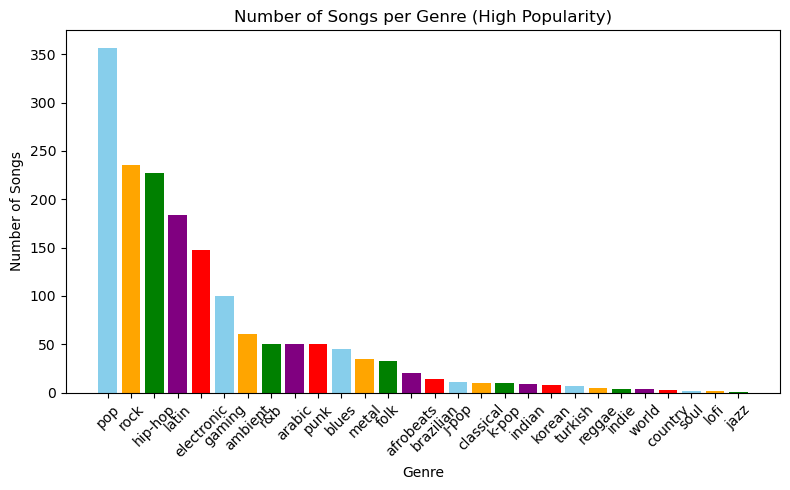

In [29]:

import matplotlib.pyplot as plt
genre_counts = dataset['playlist_genre'].value_counts() # Count songs per genre
plt.figure(figsize=(8,5))
plt.bar(genre_counts.index, genre_counts.values, color=['skyblue', 'orange', 'green', 'purple', 'red'])
plt.title('Number of Songs per Genre (High Popularity)') #title
plt.xlabel('Genre')
plt.ylabel('Number of Songs')
plt.xticks(rotation=45)  # Rotate x-axis labels 45° to avoid overlap
plt.tight_layout()
plt.savefig('Number of Songs per Genre (High Popularity).png')
plt.show()

OBSERVATION
Pop, Rock, and Hip-Hop have the most songs. Pop is the highest with 357 songs.
Some genres like Jazz, Soul, and Lofi have very few songs, so results for them may not be very strong.

In [44]:
#2. Average Energy per Genre
print("Number of genres:", dataset['playlist_genre'].nunique())
print("Number of songs:", dataset.shape[0])
# Calculate average energy per genre
avg_energy = dataset.groupby('playlist_genre')['energy'].mean().sort_values(ascending=False)
print("Average energy per genre:\n", avg_energy)


Number of genres: 28
Number of songs: 1685
Average energy per genre:
 playlist_genre
punk          0.859580
metal         0.859371
j-pop         0.813636
indie         0.748500
electronic    0.745434
k-pop         0.730900
rock          0.730285
brazilian     0.728429
afrobeats     0.712450
gaming        0.704780
pop           0.681159
latin         0.674136
turkish       0.654000
reggae        0.647600
indian        0.637000
hip-hop       0.629934
arabic        0.616020
blues         0.564156
r&b           0.540180
soul          0.538500
korean        0.528000
world         0.513250
folk          0.423576
country       0.407667
ambient       0.386884
jazz          0.182000
lofi          0.181500
classical     0.116839
Name: energy, dtype: float64


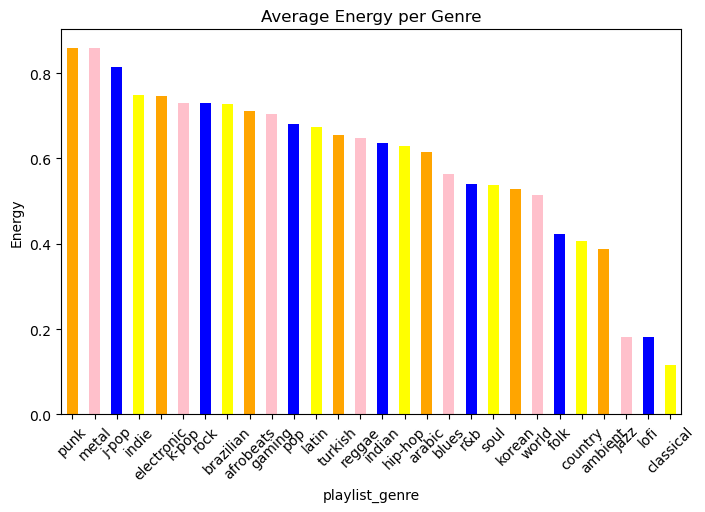

In [47]:
plt.figure(figsize=(8,5))
avg_energy = dataset.groupby('playlist_genre')['energy'].mean().sort_values(ascending=False)
avg_energy.plot(kind='bar', title='Average Energy per Genre', color=['orange','pink','blue','yellow'])
plt.ylabel('Energy')
plt.xticks(rotation=45)
plt.savefig('Average energy per Genere.png')
plt.show()


OBSERVATION
Punk and Metal have the highest energy. Classical, Jazz, and Lofi have the lowest energy.
This shows that energetic genres are usually more upbeat and loud, while calmer genres have softer sounds.

Average Danceability per Genre:
 playlist_genre
reggae        0.880000
brazilian     0.797786
k-pop         0.764600
arabic        0.756760
latin         0.744060
hip-hop       0.735982
world         0.716250
gaming        0.709260
indie         0.703250
indian        0.681778
electronic    0.677419
pop           0.652067
turkish       0.645714
r&b           0.637120
afrobeats     0.637050
blues         0.624822
j-pop         0.617091
soul          0.576000
korean        0.569000
folk          0.566879
country       0.545667
rock          0.545162
ambient       0.532918
lofi          0.510000
punk          0.493000
metal         0.444400
jazz          0.349000
classical     0.275000
Name: danceability, dtype: float64


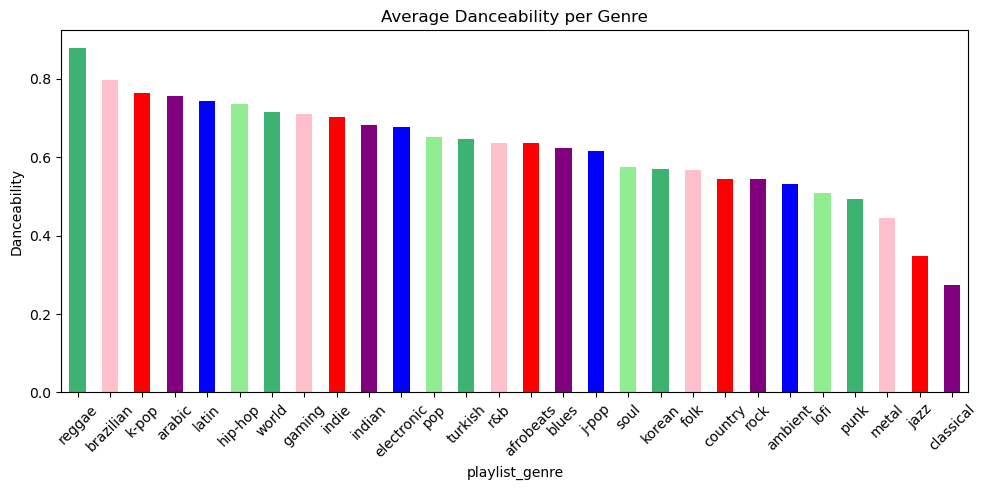

In [53]:
# 3. Danceability by Genre 
avg_danceability = dataset.groupby('playlist_genre')['danceability'].mean().sort_values(ascending=False)
print("Average Danceability per Genre:\n", avg_danceability)
avg_danceability.plot( kind='bar', color=['mediumseagreen', 'pink', 'red', 'purple', 'blue', 'lightgreen'],figsize=(10, 5))
plt.title('Average Danceability per Genre')
plt.ylabel('Danceability')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Average dancebility per genere.png')
plt.show()


Observation:
Reggae, Brazilian, and K-pop are the most danceable genres. Classical, Jazz, and Metal have the lowest danceability. 
This means upbeat and rhythmic genres are easier to dance to, while softer or heavier ones are less danceable.

Average Valence per Genre:
 playlist_genre
reggae        0.793600
indie         0.720750
afrobeats     0.707600
country       0.697000
brazilian     0.645143
j-pop         0.640909
world         0.631750
latin         0.600821
k-pop         0.591600
rock          0.581328
turkish       0.577143
pop           0.576108
punk          0.560114
r&b           0.516300
gaming        0.505986
indian        0.494111
electronic    0.471630
blues         0.461178
hip-hop       0.460695
folk          0.444833
metal         0.433200
arabic        0.426110
korean        0.348250
soul          0.346500
ambient       0.334000
jazz          0.178000
classical     0.164940
lofi          0.106750
Name: valence, dtype: float64


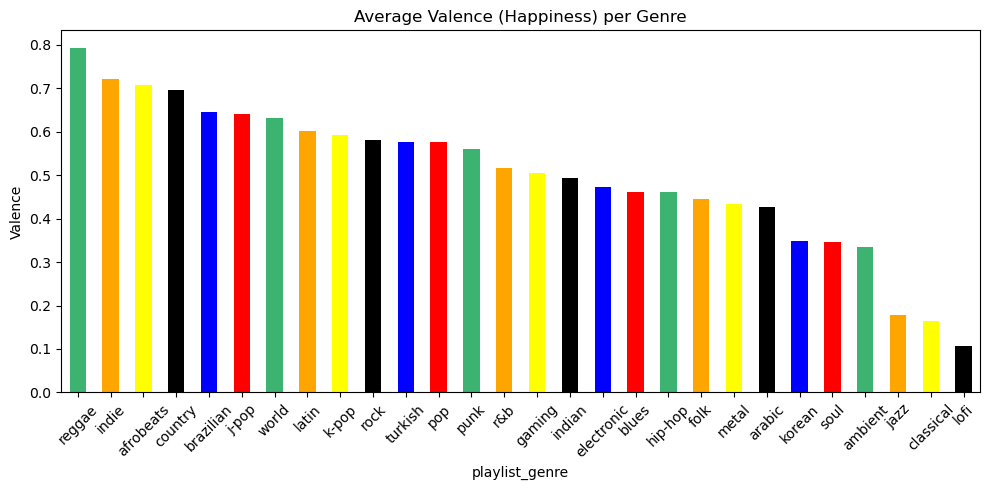

In [59]:
#4. Valence (Happiness) by Genre 
avg_valence = dataset.groupby('playlist_genre')['valence'].mean().sort_values(ascending=False)
print("Average Valence per Genre:\n", avg_valence)
avg_valence.plot(kind='bar', color=['mediumseagreen', 'orange', 'yellow', 'black', 'blue', 'red'],figsize=(10,5))
plt.title('Average Valence (Happiness) per Genre')
plt.ylabel('Valence')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Average Valence (Happiness) per Genre.png')
plt.show()

Observation:
Reggae, Indie, and Afrobeats have the highest valence, meaning they sound more cheerful and happy. 
On the other hand, Lofi, Classical, and Jazz have the lowest valence, giving a calmer or sadder mood.

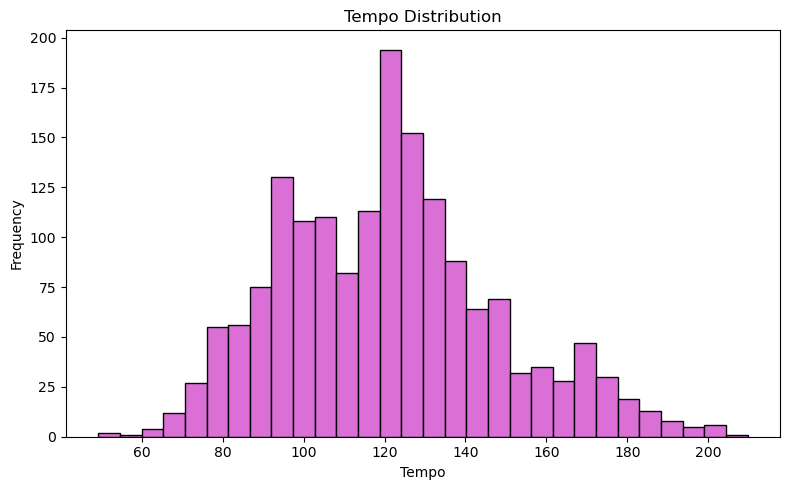

In [60]:
#5. Tempo Distribution 
plt.figure(figsize=(8, 5))
plt.hist(dataset['tempo'], bins=30, color='orchid', edgecolor='black')
plt.title('Tempo Distribution')
plt.xlabel('Tempo')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('Tempo Distribution.png')
plt.show()

#Observation
Most songs have a tempo between 175 and 200 BPM, which means the songs are generally fast-paced.
There are fewer songs with very slow tempo.
So, high-energy and fast-beat music is more common in this dataset.

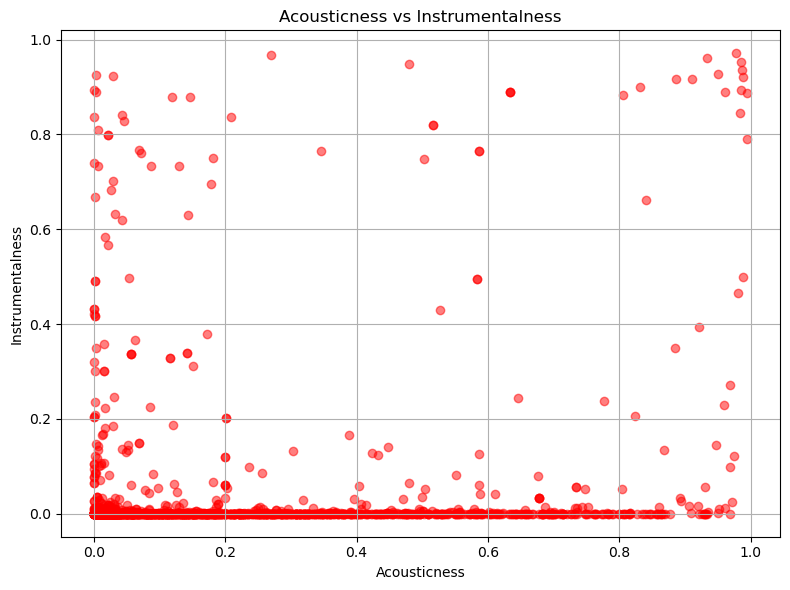

In [62]:
#6 Acoustic vs Instrumenta
plt.figure(figsize=(8, 6))
plt.scatter(dataset['acousticness'], dataset['instrumentalness'], alpha=0.5, color='red')
plt.title('Acousticness vs Instrumentalness')
plt.xlabel('Acousticness')
plt.ylabel('Instrumentalness')
plt.grid(True)
plt.tight_layout()
plt.show()

Average Duration per Genre (minutes):
 playlist_genre
metal         5.101778
blues         4.347493
rock          4.157183
indian        4.008372
reggae        3.880800
korean        3.745769
indie         3.705679
r&b           3.652043
ambient       3.650458
pop           3.623187
punk          3.613566
soul          3.560108
world         3.553329
j-pop         3.484941
latin         3.475724
folk          3.368753
electronic    3.348104
hip-hop       3.329658
classical     3.286955
jazz          3.199550
lofi          3.058433
k-pop         3.052950
arabic        3.049598
country       3.006744
afrobeats     2.960110
gaming        2.886165
turkish       2.781917
brazilian     2.315058
Name: duration_minutes, dtype: float64


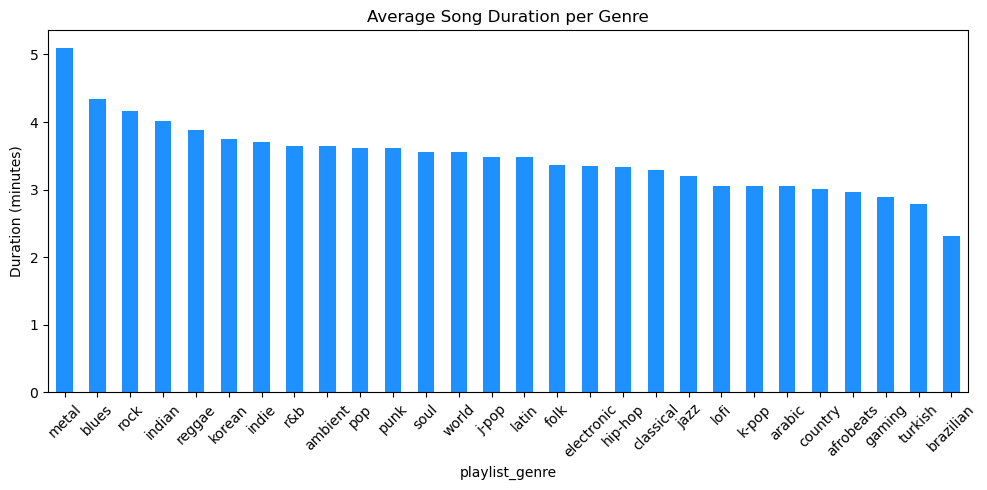

In [63]:
# 7. Duration Analysis
dataset['duration_minutes'] = dataset['duration_ms'] / 60000
avg_duration = dataset.groupby('playlist_genre')['duration_minutes'].mean().sort_values(ascending=False)
print("Average Duration per Genre (minutes):\n", avg_duration)

avg_duration.plot(kind='bar', color='dodgerblue', figsize=(10,5))
plt.title('Average Song Duration per Genre')
plt.ylabel('Duration (minutes)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


OBSERVATION
Average Song Duration per Genre:
Metal songs are the longest on average (around 5.1 minutes), followed by Blues and Rock.
Brazilian tracks are the shortest, averaging just 2.3 minutes.
Genres like Hip-Hop, K-Pop, and Gaming also tend to have shorter durations.
This shows that older or instrumental-heavy genres usually have longer tracks, while modern or commercial genres prefer shorter songs.

Average Speechiness per Genre:
 playlist_genre
reggae        0.242400
arabic        0.209708
hip-hop       0.204937
brazilian     0.199843
afrobeats     0.128285
latin         0.120848
r&b           0.116846
lofi          0.111850
j-pop         0.110500
gaming        0.106568
k-pop         0.102810
metal         0.079540
world         0.076600
ambient       0.073541
electronic    0.072509
turkish       0.072471
punk          0.069306
pop           0.067425
blues         0.067364
indian        0.055422
rock          0.055137
soul          0.052250
country       0.049133
indie         0.044450
classical     0.042350
folk          0.039567
korean        0.036125
jazz          0.031000
Name: speechiness, dtype: float64


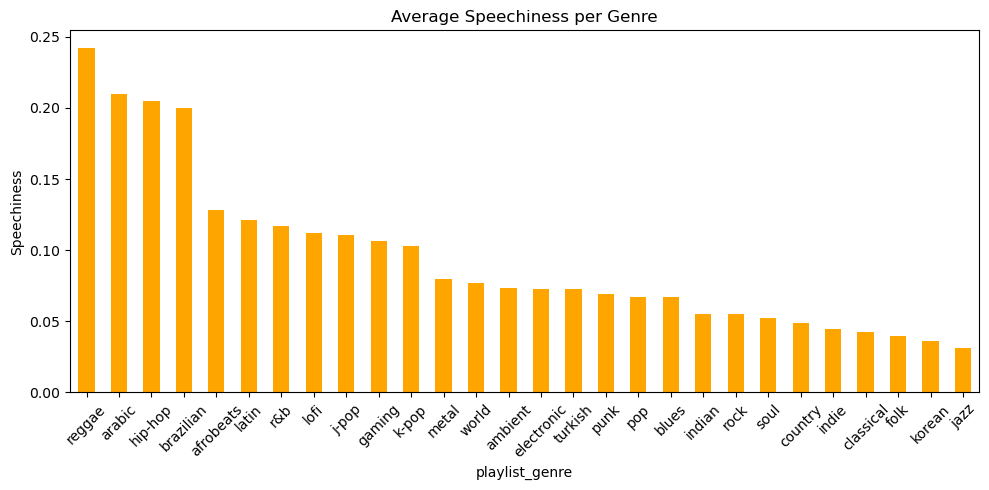

In [64]:
#8. Speechiness (Rap/Spoken)
avg_speech = dataset.groupby('playlist_genre')['speechiness'].mean().sort_values(ascending=False)
print("Average Speechiness per Genre:\n", avg_speech)

avg_speech.plot(kind='bar', color='orange', figsize=(10,5))
plt.title('Average Speechiness per Genre')
plt.ylabel('Speechiness')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


OBSERVATION
Speechiness by Genre:
Reggae, Arabic, and Hip-Hop have the highest speechiness, meaning they contain more spoken words or rap-like vocals.
Jazz, Korean, and Folk have the lowest speechiness, showing they are more instrumental or melodic.
This tells us that Hip-Hop and Reggae focus more on lyrics or vocal delivery, while Jazz and Classical rely more on instruments.

Mode Count:
 mode
1    975
0    710
Name: count, dtype: int64


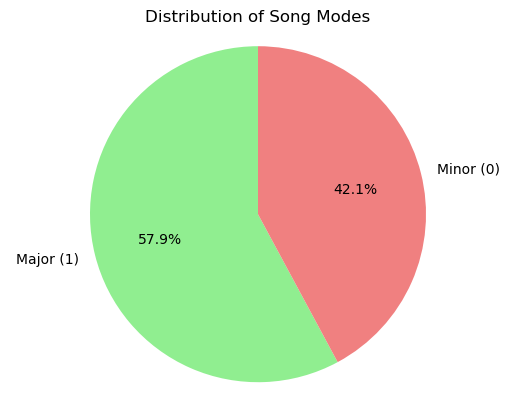

In [65]:
# 9. Mode (Major/Minor) 
mode_counts = dataset['mode'].value_counts()
print("Mode Count:\n", mode_counts)

labels = ['Major (1)', 'Minor (0)']
plt.pie(mode_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'lightcoral'])
plt.title('Distribution of Song Modes')
plt.axis('equal')
plt.show()


Observation
Mode Distribution:
Major mode (1) tracks: 975
Minor mode (0) tracks: 710

Time Signature Counts:
 time_signature
1       7
3      92
4    1557
5      29
Name: count, dtype: int64


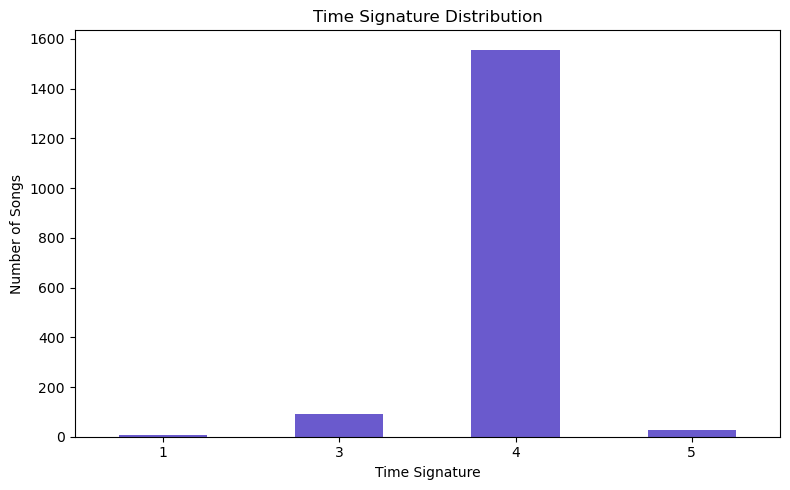

In [66]:
#10. Time Signature Analysis
signature_counts = dataset['time_signature'].value_counts().sort_index()
print("Time Signature Counts:\n", signature_counts)

signature_counts.plot(kind='bar', color='slateblue', figsize=(8,5))
plt.title('Time Signature Distribution')
plt.xlabel('Time Signature')
plt.ylabel('Number of Songs')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


OBSERVATION
Time Signature Distribution:

    4/4 time: 1557 tracks —  Most common, typical in pop, rock, and most modern genres.

    3/4 time: 92 tracks — Often used in waltz or softer styles.

    5/4 time: 29 tracks —  Rare and more experimental.

    1/4 time: 7 tracks —  Very unusual, possibly intros or effects.

 Most music follows the 4/4 pattern, which feels natural and balanced.

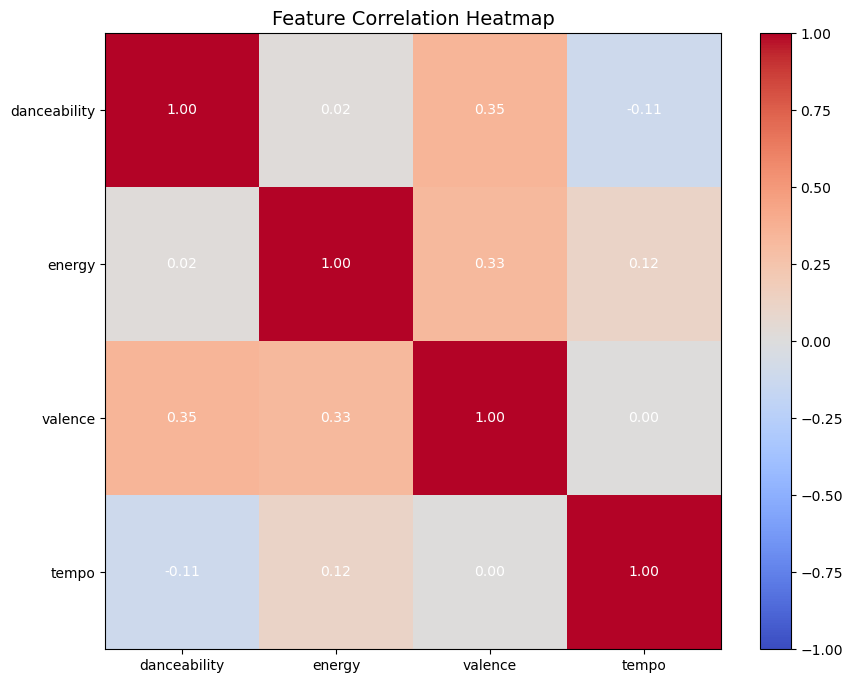

In [76]:
# Calculate correlations
corr = dataset[['danceability','energy','valence','tempo']].corr()
# Create heatmap
fig, ax = plt.subplots(figsize=(10,8))
im = ax.imshow(corr, cmap='coolwarm', vmin=-1, vmax=1)

# Annotate values
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        text = ax.text(j, i, f'{corr.iloc[i, j]:.2f}',
                     ha='center', va='center', color='w')
# Setup labels
ax.set_xticks(range(len(corr.columns)))
ax.set_yticks(range(len(corr.columns)))
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)
plt.title('Feature Correlation Heatmap', fontsize=14)
plt.colorbar(im)
plt.savefig('corelation.png')
plt.show()

Final Visulization

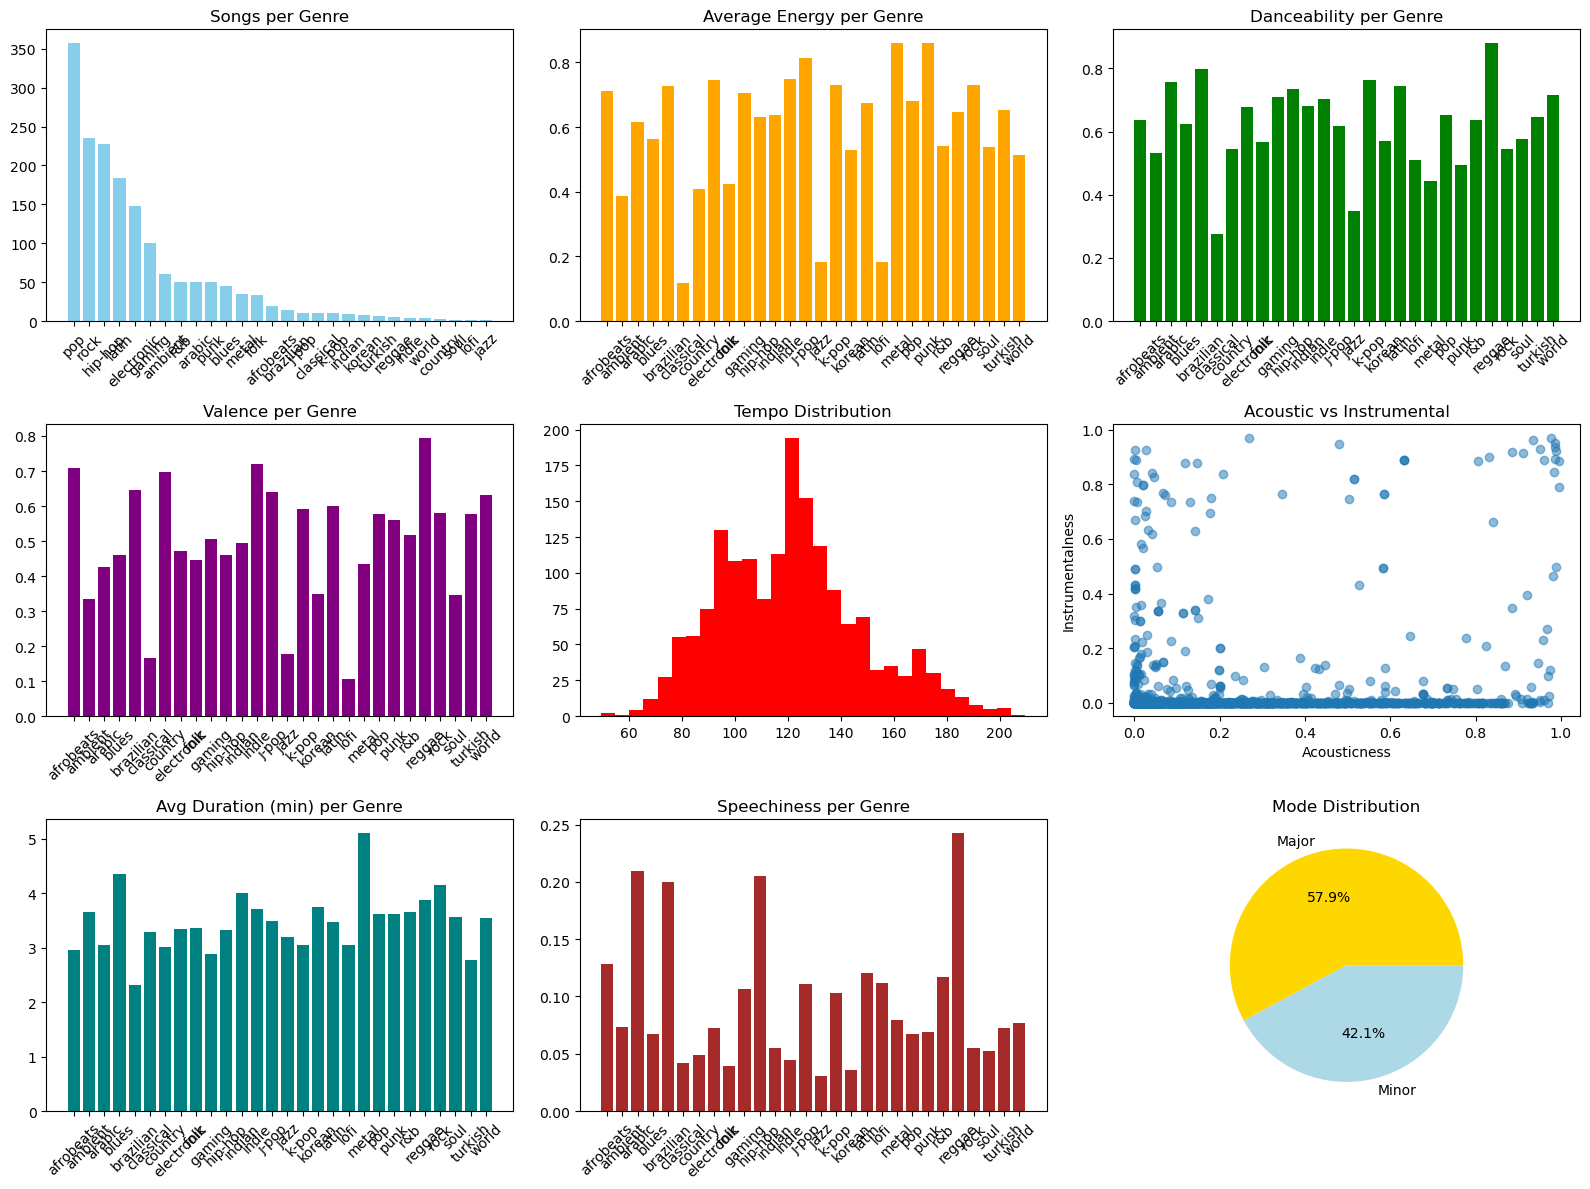

In [69]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 12))

# 1. Songs per Genre
plt.subplot(3, 3, 1)
genre_counts = dataset['playlist_genre'].value_counts()
plt.bar(genre_counts.index, genre_counts.values, color='skyblue')
plt.title('Songs per Genre')
plt.xticks(rotation=45)

# 2. Average Energy per Genre
plt.subplot(3, 3, 2)
energy_avg = dataset.groupby('playlist_genre')['energy'].mean()
plt.bar(energy_avg.index, energy_avg.values, color='orange')
plt.title('Average Energy per Genre')
plt.xticks(rotation=45)

# 3. Danceability by Genre
plt.subplot(3, 3, 3)
dance_avg = dataset.groupby('playlist_genre')['danceability'].mean()
plt.bar(dance_avg.index, dance_avg.values, color='green')
plt.title('Danceability per Genre')
plt.xticks(rotation=45)

# 4. Valence by Genre
plt.subplot(3, 3, 4)
valence_avg = dataset.groupby('playlist_genre')['valence'].mean()
plt.bar(valence_avg.index, valence_avg.values, color='purple')
plt.title('Valence per Genre')
plt.xticks(rotation=45)

# 5. Tempo Distribution
plt.subplot(3, 3, 5)
plt.hist(dataset['tempo'], bins=30, color='red')
plt.title('Tempo Distribution')

# 6. Acousticness vs Instrumentalness
plt.subplot(3, 3, 6)
plt.scatter(dataset['acousticness'], dataset['instrumentalness'], alpha=0.5)
plt.title('Acoustic vs Instrumental')
plt.xlabel('Acousticness')
plt.ylabel('Instrumentalness')

# 7. Duration in minutes per Genre
plt.subplot(3, 3, 7)
dataset['duration_min'] = dataset['duration_ms'] / 60000
duration_avg = dataset.groupby('playlist_genre')['duration_min'].mean()
plt.bar(duration_avg.index, duration_avg.values, color='teal')
plt.title('Avg Duration (min) per Genre')
plt.xticks(rotation=45)

# 8. Speechiness by Genre
plt.subplot(3, 3, 8)
speech_avg = dataset.groupby('playlist_genre')['speechiness'].mean()
plt.bar(speech_avg.index, speech_avg.values, color='brown')
plt.title('Speechiness per Genre')
plt.xticks(rotation=45)

# 9. Mode (Major/Minor) Distribution
plt.subplot(3, 3, 9)
mode_counts = dataset['mode'].value_counts()
plt.pie(mode_counts, labels=['Major', 'Minor'], autopct='%1.1f%%', colors=['gold', 'lightblue'])
plt.title('Mode Distribution')

plt.tight_layout()
plt.savefig("Music_Feature_Dashboard.png")
plt.show()


# OVERALL OBSERVATION
Pop is the most common genre.
Hip-Hop and R&B are very danceable.
Most songs have 80–120 BPM tempo.
Metal songs are longest; Gaming the shortest.
Hip-Hop, Arabic, and Reggae have more speech.
Classical and Ambient are more instrumental.
Major mode (happy tone) is more common.
Most songs use 4/4 time signature.

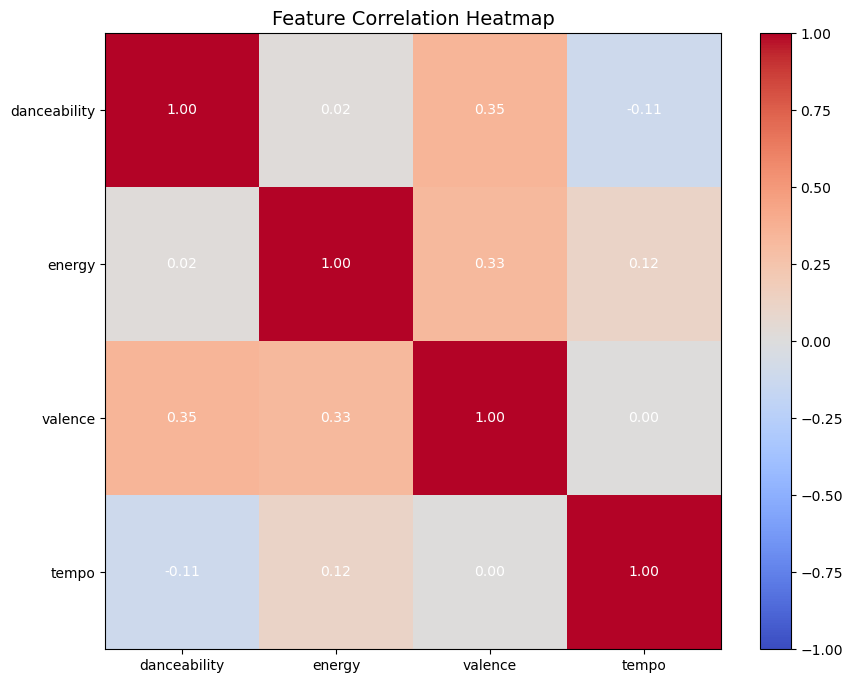